# COMP 499 Introduction to Data Analysis
# Project Report
## Presented By: Genevieve Plante-Brisebois 40003112  Presented To : Greg Butler
### June 18, 2019
### To see the Analysis, go to Project Report Section (Page 14). Preliminary section will only cover the data wrangling, presentation of the data and introduction to the project. 



## Preliminary Report Section
### Introduction of the dataset and report
This is the prelimminary report for the course Data Analysis in Summer 2019 presented by Genevieve Plante-Brisebois. The dataset that is chosen to do the project is Google Play Store Apps taken from this website: https://www.kaggle.com/lava18/google-play-store-apps . The information in this dataset covers each app in respect with their name, rating, reviews, number of downloads, type, price, file size, content rating, genres, last version/update made, current version and the android version needed in order to run the apps. The dataset contains 9660 records. It is comprised of the csv document for the general information of the applications as described above and a csv document comprised of the reviews and given ratings to the applications. The Review csv is taking the top 100 reviews from each application which has received reviews. 

Using these datasets, there are multiple questions that I will attempt to answer and, as the answers are found, they will become the basis for the next one. This will be done in three stages. 

1- What is more popular and fruitfull between free and paid applications and predict the present and upcoming trend?

To answer that question I will be making exploratory analysis of the data. I will be taking a look at the data and compare the number of downloads of each application and then try to see what is the one coming up on top in terms of poopularity by combining with the ratings. 

For an information purpose, the revenue of the paid apps will be calculated as it could help to see if it is profitable. However, it is impossible to get the information about the revenue for the free applications. If it would be possible to find the data of the revenue from the free applications with the adds it would be a good way to enrich the dataset and add another feature to analyse the set. 

2- What are the rising trends in the app type that will have won the previous question?

This will try to answer if there are categories and target audiences that are more proeminent and are the trend or upcomming trends. This will again be done by doing exploratory data analysis. Just like with the previous question, it will be used to narrow down the amount of data that will be used in the next step. By further narowing our criterias, we will be able to bring ourselves to the last step of this process. 


3- Predict the impact of the reviews and rating on the number of downloads. 

From the selected apps in the previous questions, we will take a look at the reviews dataset. Using exploratory data analysis and natural language processing, we will try to create new feature that will hopefully allow us to see if there is a link between the reviews, the ratings and the success of an application in the trending categories. The success we are looking at for the apps in this case is the number of downloads. From the information found here we will try to predict the influence and potentially the growth of the applications that are present in these categories.

### Steps to Data retrieval 

In order to retrievee the data from this set, these are the steps to follow. 

1-Go to the www.kaggle.com website and create an account if you do not have one yet.

2-Then there will be a need to go to the  https://www.kaggle.com/lava18/google-play-store-apps page and click on the download button at the top of the page. If you desire to have more information about the data set, you can read the page and see the information and summary that has been provided for this data set. 

3- Make sure that you are creating a data folder where you are having the jupyter book and in that data folder extract all the concerned information that is in the zip folder.  You should be able to have the googleplaystore.csv and the googleplaystore_user_reviews.csv file. 


Now in order to use the data directly via scripting, the data is also available by doing the following lines in python


In [1]:
import urllib.request
urllib.request.urlretrieve("https://drive.google.com/drive/folders/17Ad0l9iWsOooz4AGA6H1NbeF9nYS0tNY", "googleplaystore.csv")
urllib.request.urlretrieve("https://drive.google.com/drive/folders/17Ad0l9iWsOooz4AGA6H1NbeF9nYS0tNY", "googleplaystore_user_reviews.csv")


('googleplaystore_user_reviews.csv',
 <http.client.HTTPMessage at 0x1c1390f8f60>)

### Data Wrangling

In this section the data wrangling will be done in order to clean the datasets as much as possible and to be able to do our analysis later. I will only note that the natural processing of the review data set will not be done now as this will be the whole task of the question 3, building the features and make the prediction. 


#### Importing Data, Data Types and Formatings the Dataframes

In [2]:
import pandas as pd


google = pd.read_csv("data/googleplaystore.csv")
print(google.columns)
review = pd.read_csv('data/googleplaystore_user_reviews.csv')
#get data types 
print(google.dtypes)
review.dtypes





Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

Now that we have the columns and the data types that we have to deal with, we can see if we need to cast some of the data types. From the data types here, we can see that we need to cast a few of them such as the price, number of reviews. 

In [3]:
google.Reviews.astype('int64')
google.Price.astype('float64')
google.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

From the data set of the reviews, we can see that there is the sentiment polarity and the sentiment subjectivity columns, however, there is no scale prrovided in the kaggle page so that we know what these data use as scales. As we do not know the scales, these columns will be dismissed from the data frame that we will be using for the project. 

In [4]:
review = review[['App', 'Translated_Review', 'Sentiment']]
review.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive


#### Data Cleaning

Now we can try to see if we have any nan values for all the columns

In [5]:
print(google.isnull().sum(),'\n')
print(review.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64 

App                      0
Translated_Review    26868
Sentiment            26863
dtype: int64


Now that we kow which values have some nan values, we can look into the means, for those that are applicable and see how we are going to handle the data in order to know how we are going to handle the nan values. 

For the review dataset, the only way to really handle it will be to take out the rows that have nan values as there are too many nan values. Moreover, for the reviews, we will be focussing later on natural language processing, which means that we do not want nan values and we only want to evaluate the reviews where a comment was left behind. The other reviews were most likely simply someone who decided to only give a star rating and no commentary review. As both rating from the google dataset and the comment reviews left will be taken into account in order to try to make predictions, taking away the nan rows from the review dataset is ok.  

For the general app dataset, it will be possible to use mean values or default values in order to take care of those nan values. Once we take care of the nan values we will be able to normalize. 

In [6]:
review = review.dropna()

google.Rating.describe()


count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [7]:
mean_r = google.Rating.mean()
google['Rating'].fillna(value=mean_r, inplace = True)

In [8]:
print(google.isnull().sum(),'\n')


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64 



In [9]:
google.Type.describe()

count     10840
unique        2
top        Free
freq      10040
Name: Type, dtype: object

In [10]:
google['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

For the last nan values in the set, the values cannot be assumed. If we do not have a version of the software or the version of Android needed we cannot simply guess those values. However, as there are only a few data that contain nan, 12, and that our dataset is quite large, 9000+ , it will not have a major impact to remove those nan values.

In [11]:
google = google.dropna()
print('Google Store General Information Dataset:\n')
print(google.isnull().sum(),'\n')

print(google.dtypes, '\n\n')

print('Reviews of the applications dataset: \n')
print(review.isnull().sum(), '\n')

print(review.dtypes)

Google Store General Information Dataset:

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64 

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object 


Reviews of the applications dataset: 

App                  0
Translated_Review    0
Sentiment            0
dtype: int64 

App                  object
Translated_Review    object
Sentiment            object
dtype: object


Now we are going to verify if there are duplicates since we only want to have the data once. This step will only be using the data from the google set. The review set has no record ID and there is no way of knowing if it is simply multiple reviews with similar or same comments for an application or if it is duplicates. As such, we will make the assumption that all the records are unique. 

In [12]:
print('Before droping the duplicates')
google.App.duplicated().sum()

Before droping the duplicates


1181

In [13]:
#drop the dulicates

google = google.drop_duplicates(subset='App', keep='first')
print('After droping the duplicates')
google.App.duplicated().sum()

After droping the duplicates


0

In [14]:
print(google.head())
review.head()

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type  Price Content Rating  \
0      159   19M      10,000+  Free    0.0       Everyone   
1      967   14M     500,000+  Free    0.0       Everyone   
2    87510  8.7M   5,000,000+  Free    0.0       Everyone   
3   215644   25M  50,000,000+  Free    0.0           Teen   
4      967  2.8M     100,000+  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design     7-Jan-18               1.0.0  4.0.3 and u

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive
5,10 Best Foods for You,Best way,Positive


####  Normalizing

Now that we have all the data structured and cleaned up, we can take a look at what needs to be normalized. This will help if we ever want to combine the sets or want to enrich the sets later on. By have the normalization done it will help lower the number of possible inconsistencies. 

The sets will need a little bit of cleaning, as to make the text as uniform as possible for what we are trying to do in the next steps of the project. 

In [15]:
#this function can be used on names and sentences and also on categories such as sentiment, content rating, etc
def preprocess_text(name):
    name = name.lower()
    name = name.replace(',', ' ')
    name = name.replace("'", '')    
    name = name.replace('&', 'and')
    name = name.replace('?', '')
    name = name.replace('_', ' ')
    #name = name.decode('utf-8', 'ignore')
    return name.strip()


google['App'] = google['App'].map(preprocess_text)
google['Category'] = google['Category'].map(preprocess_text)
google['Type'] = google['Type'].map(preprocess_text)
google['Genres'] = google['Genres'].map(preprocess_text)
google['Content Rating'] = google['Content Rating'].map(preprocess_text)

review['App'] = review['App'].map(preprocess_text)
review['Translated_Review'] = review['Translated_Review'].map(preprocess_text)
review['Sentiment'] = review['Sentiment'].map(preprocess_text)

In [16]:
google.App.duplicated().sum()

25

In [17]:
#we have found more duplicates now that we have normalized the settings so we are going to drop the new duplicates that are found. 

google = google.drop_duplicates(subset='App', keep='first')
print('After droping the duplicates created by normalizing')
google.App.duplicated().sum()

After droping the duplicates created by normalizing


0

#### Final restructuration of the datasets:

As we are now done with normalizing and cleaning, we are going to finish up some last adjustments. In the annalysis that we wil have to do, we will not use the data from the size of the app, the current version, the last time it was updated nor the android version. As these data will not be used in the analysis, we are going to take them out from our working data frame. 

In [18]:
google = google[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']]


### Dataset Descriptions

Now that we have cleaned and normalized our datasets, we can take a look at what they are. 

Here is the set of the general information of the google store applications:



In [19]:

google.head(10)


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,photo editor and candy camera and grid and scr...,art and design,4.1,159,"10,000+",free,0.0,everyone,art and design
1,coloring book moana,art and design,3.9,967,"500,000+",free,0.0,everyone,art and design;pretend play
2,u launcher lite – free live cool themes hide ...,art and design,4.7,87510,"5,000,000+",free,0.0,everyone,art and design
3,sketch - draw and paint,art and design,4.5,215644,"50,000,000+",free,0.0,teen,art and design
4,pixel draw - number art coloring book,art and design,4.3,967,"100,000+",free,0.0,everyone,art and design;creativity
5,paper flowers instructions,art and design,4.4,167,"50,000+",free,0.0,everyone,art and design
6,smoke effect photo maker - smoke editor,art and design,3.8,178,"50,000+",free,0.0,everyone,art and design
7,infinite painter,art and design,4.1,36815,"1,000,000+",free,0.0,everyone,art and design
8,garden coloring book,art and design,4.4,13791,"1,000,000+",free,0.0,everyone,art and design
9,kids paint free - drawing fun,art and design,4.7,121,"10,000+",free,0.0,everyone,art and design;creativity


In [20]:
google.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [21]:
print(google.App.describe(),'\n')
print(google.Category.describe(),'\n')
print(google.Rating.describe(),'\n')
print(google.Reviews.describe(),'\n')
print(google.Installs.describe(),'\n')
print(google.Type.describe(),'\n')
print(google['Content Rating'].describe(),'\n')
print(google.Genres.describe(),'\n')

count                                 9623
unique                                9623
top       thomas and friends: go go thomas
freq                                     1
Name: App, dtype: object 

count       9623
unique        33
top       family
freq        1822
Name: Category, dtype: object 

count    9623.000000
mean        4.176849
std         0.494663
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64 

count    9.623000e+03
mean     2.168584e+05
std      1.834069e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.750000e+02
75%      2.949000e+04
max      7.815831e+07
Name: Reviews, dtype: float64 

count           9623
unique            20
top       1,000,000+
freq            1415
Name: Installs, dtype: object 

count     9623
unique       2
top       free
freq      8873
Name: Type, dtype: object 

count         9623
unique           6
top       everyone
freq          7870
Name: Content 

In [22]:
review.head(10)

,App,Translated_Review,Sentiment
0,10 best foods for you,i like eat delicious food. thats im cooking fo...,positive
1,10 best foods for you,this help eating healthy exercise regular basis,positive
3,10 best foods for you,works great especially going grocery store,positive
4,10 best foods for you,best idea us,positive
5,10 best foods for you,best way,positive
6,10 best foods for you,amazing,positive
8,10 best foods for you,looking forward app,neutral
9,10 best foods for you,it helpful site ! it help foods get !,neutral
10,10 best foods for you,good you.,positive
11,10 best foods for you,useful information the amount spelling errors ...,positive


In [23]:
review.dtypes

App                  object
Translated_Review    object
Sentiment            object
dtype: object

In [24]:
print(review.App.describe(),'\n')
print(review.Translated_Review.describe(),'\n')
print(review.Sentiment.describe(),'\n')

count          37427
unique           865
top       bowmasters
freq             312
Name: App, dtype: object 

count     37427
unique    27866
top        good
freq        296
Name: Translated_Review, dtype: object 

count        37427
unique           3
top       positive
freq         23998
Name: Sentiment, dtype: object 



### Summary of Preliminary Report

As a summary and ending note for this preliminary report here are the guidelines of the questions that we are going to be asked and that we are looking for answers to. For the questions that we want to answer they are:


1- What is more popular and fruitfull between free and paid applications and predict the present and upcoming trend?

2- What are the rising trends in the app type that will have won the previous question?

3- Predict the impact of the reviews and rating on the number of downloads.

Now we are using two main dataset, google play general information and reviews information. However, for the first two questions we wil be using solely the first dataset. The second dataset will be used duging the third phase and we will try to use natural processing to make new features and try to see how the comments and ratings might affect and lead to a more successfull application. 

A note to keep in mind, as the exploratory data analysis will be done, the first dataset might be enriched with other datasets that were inspired by that dataset and that have even more data. Those datasets mght be used for testing or validation purposes but are not the main ones. Their use will be evaluated in more details as we go further in the analysis. 

The dataset that might be used for enrichment, validation or testing is the following: 
https://www.kaggle.com/gauthamp10/google-playstore-apps





## Project Report

### Introduction to the Report

In this section of the project, we will attempt to answer the questions that we have asked in the preliminary report. According to what the data shows, the questions might change or bring new insight on the situation. The main goal that we are trying to answer is to learn what makes an application successful, which means that it has a high installation rate. This will be done by looking at the type, then the categories and finnaly by taking a look at the ratings and reviews and see if there is a link between the success of an application and its ratings. 

### Question 1 - What is more popular and fruitfull between free and paid applications and the prediction of the upcoming trends

In this section we are going to be doing the exploratory data analysis of the comparison between the free and the paids applications. We are going to measure the success rate of an application by their download(installation) rates. We are going to first plot the data and then try to see if we can make a prediction according to the current data.

(8873, 9)
(750, 9)


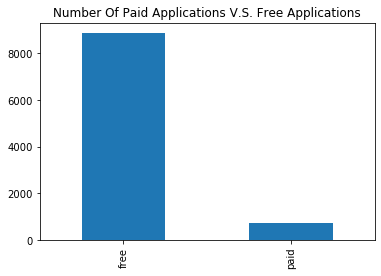

In [137]:
pre_histo1 = google[['Type', 'Installs', 'App']]
histo_1 = pre_histo1.groupby(['Type', 'Installs']).count()
pre_histo1.groupby(['Type', 'Installs']).count().sort_values(by = ['Installs'])
group_1 = google.loc[google['Type' ]== 'free']
group_2 = google.loc[google['Type' ]== 'paid']
print(group_1.shape)

print(group_2.shape)

type_rep = google[['Type', 'App']]

type_rep.head()
type_rep.Type.value_counts().plot(kind = 'bar', title = 'Number Of Paid Applications V.S. Free Applications')

If we compare everything combined together, we will get tables like these and a graph like the one below. We will afterwards try to see what the resulst are when we take them in term of proportions. Are the results still going to be the same or not? The volume of data being in free is many times the amount of data for the paid applications. That being said we have to keep in mind it might be a reflection of the reality just as it can be a reflextion of a sample of data that the people who built this set have. Checking the information in terms of proportion will help to counter that and help to have a better view of the situation. 

In [26]:
pre_histo1.groupby(['Type', 'Installs']).count()

App
Type Installs            
free 0+                 4
     1+                46
     1,000+           747
     1,000,000+      1395
     1,000,000,000+    20
     10+              314
     10,000+          909
     10,000,000+      933
     100+             612
     100,000+        1027
     100,000,000+     187
     5+                70
     5,000+           401
     5,000,000+       606
     50+              170
     50,000+          427
     50,000,000+      202
     500+             288
     500,000+         491
     500,000,000+      24
paid 0+                 9
     1+                21
     1,000+           137
     1,000,000+        20
     10+               69
     10,000+          116
     10,000,000+        2
     100+              94
     100,000+          82
     5+                12
     5,000+            64
     50+               34
     50,000+           39
     500+              40
     500,000+          11

In [27]:
pre_histo1['Type'].value_counts(normalize = True).plot(kind = 'bar', title = "Number of Paid Applications v.s. Free Applications")

From the two tables that are shown above,  we can see that there are much more installations of the free applications than of the paid applications. Some of the larger categories of downloads like 1 000 000 000 + and 500 000 000+ installations are not even present for the paid applications. Moreover, for each category, the number of free application installed is larger than the number of paid application installed. The smallest difference present in terms of the number of applications that are installed is of 5, where there are 4 applications that are free and that are at 0+ installations and 9 paid application that have 0+ installations. The largest difference between the two types is of with the number of 1 000 000+ installation. It is a difference of 1375 applications, being that there are only 20 applications that are able to get 1 000 000+ installations whereas there are 1395 applications that have these numbers of installations.

However, we want to see what the distributions are like when we compare them properly and also when we compare the proportions of each. As such, we are going to separate the two types of applications into two groups and try to see how they statistics compare to each other in terms of proportions. 

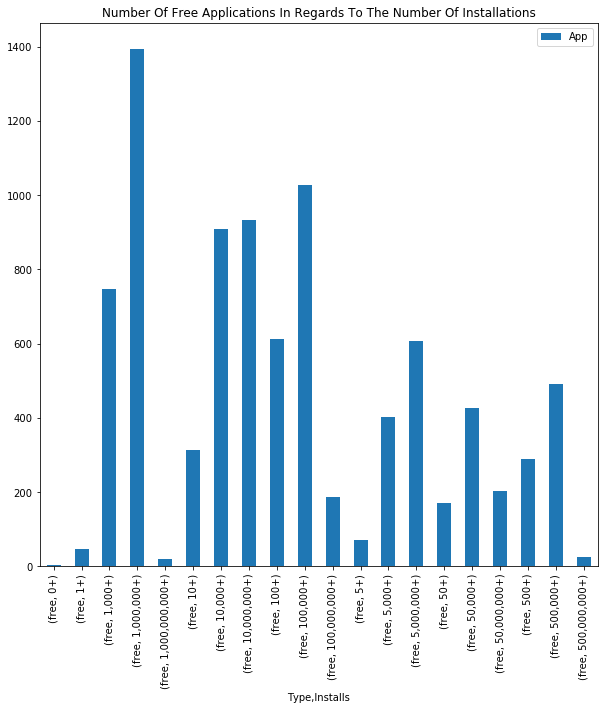

In [138]:
group_1_type = group_1[['Type', 'Installs', 'App']]

group_1_type.groupby(['Type', 'Installs']).count().sort_values(by = ['Installs']).plot.bar(figsize = (10,10), title = 'Number Of Free Applications In Regards To The Number Of Installations')
#This is for the free applications

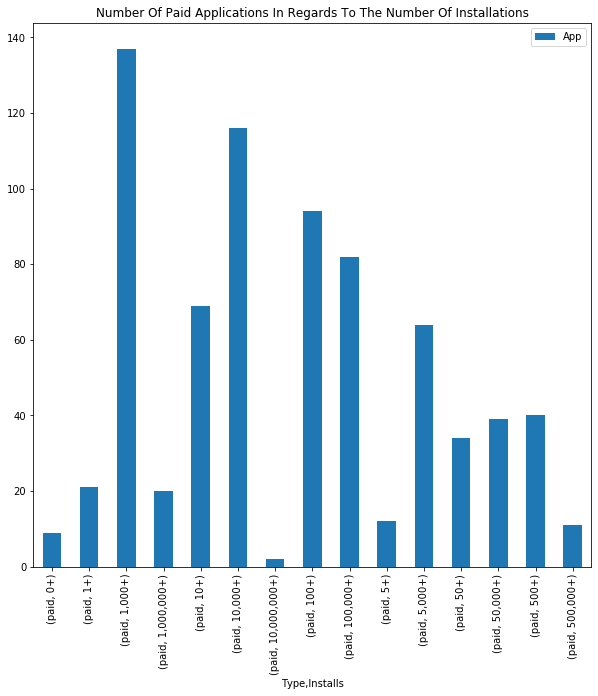

In [139]:
group_2_type = group_2[['Type', 'Installs', 'App']]

group_2_type.groupby(['Type', 'Installs']).count().sort_values(by = ['Installs']).plot.bar(figsize = (10,10), title = 'Number Of Paid Applications In Regards To The Number Of Installations')
#This is for the paid applications.

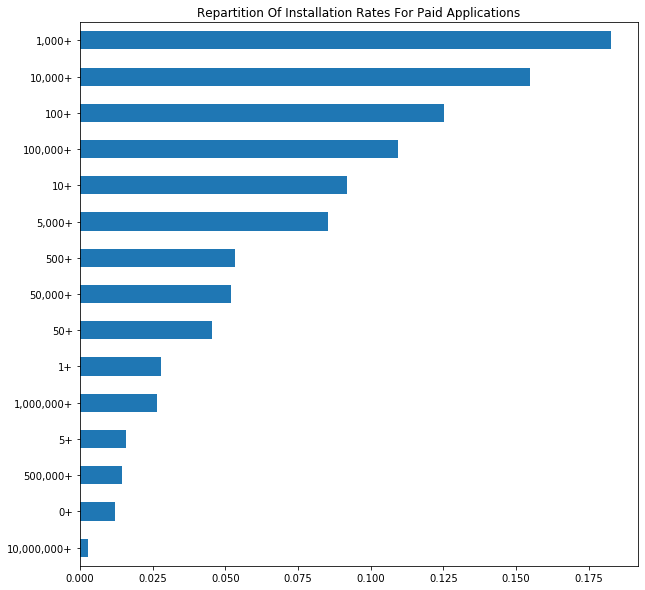

In [30]:

group_2_type['Installs'].value_counts(normalize = True).sort_values(ascending=True).plot.barh(title ='Repartition Of Installation Rates For Paid Applications', figsize = (10,10) )

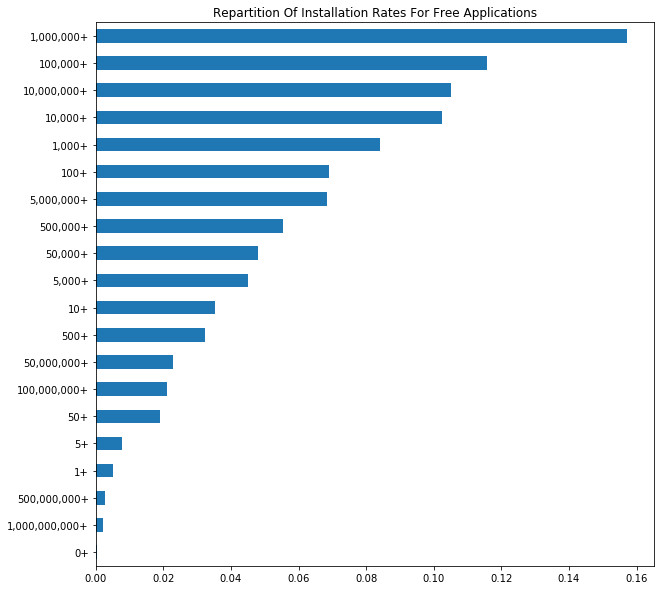

In [31]:

group_1_type['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Free Applications', figsize = (10,10))

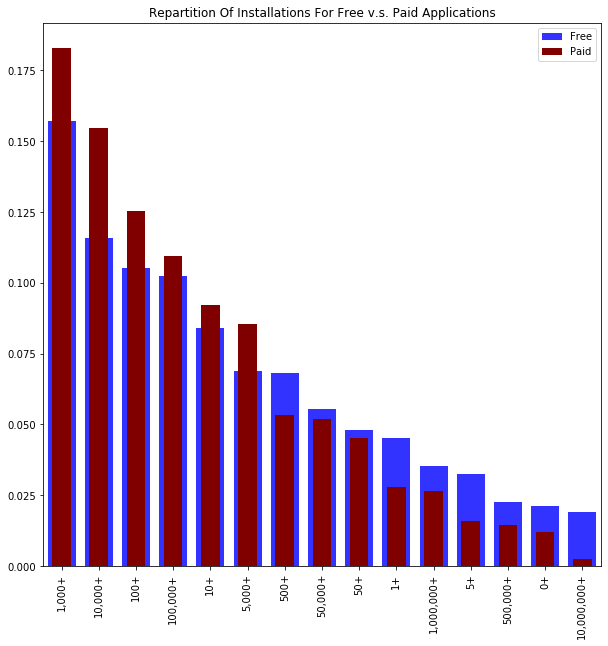

In [32]:
ax = group_1_type['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
group_2_type['Installs'].value_counts(normalize = "True").plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (10,10), title = "Repartition Of Installations For Free v.s. Paid Applications")
ax.legend(['Free', 'Paid'])

From the graphs above, we can see that the mode of the free application is 1 000 000+ installations vs for the paid application it is 1 000+ applications. 

In [33]:
print('The average rating of the free applications is :',group_1['Rating'].mean())
print('The average rating of the paid applications is:', group_2['Rating'].mean())

The average rating of the free applications is : 4.170891448767808
The average rating of the paid applications is: 4.247334329739152


From the information above, we can see that the free applications are more successfull than the paid applications in term of download rates (installations), but they have highly similar average ratings. As we further the analysis, we will try to see if the ratings combined with the type and genre of the application have an influence on each other in order to make an application more successfull than an other one. The current data seem to show that the type of applications that one build will have a high impact on its success.

### Question 2 - Which categories are the most successful? Which are setting the current trend?
For this section we are going to try to see if the categories of application can influence the success of an application. We are going to start by looking at the repartition of the categories among the applications that are available in the google play store and then we are going to add a second layer of looking at the number of installations. We need to look at those two layers in order to see what category really is the most successfull. If a category has a low number of applications yet they are the applications with the most number of downloads then it will indicate that this category in particular might be better than a category that has a higher number of application yet not as many downloads. 


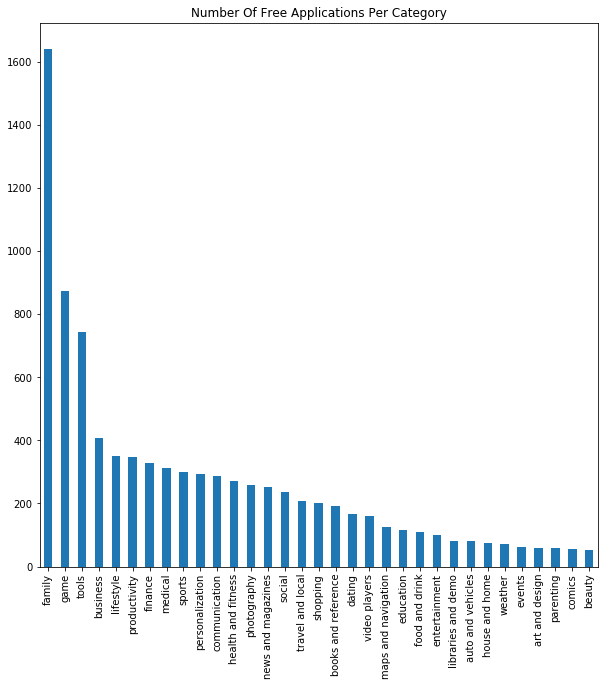

In [34]:
group_1['Category'].value_counts().plot(kind = 'bar', title = 'Number Of Free Applications Per Category', figsize = (10,10))

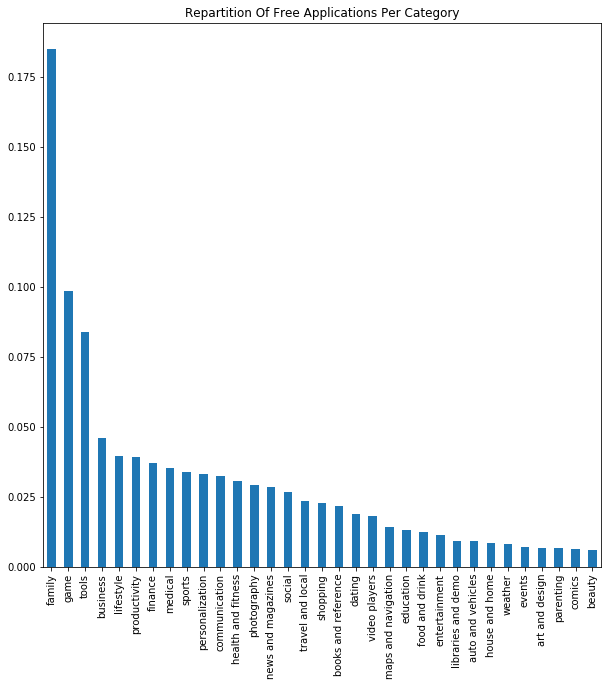

In [35]:
group_1['Category'].value_counts(normalize = "True").plot.bar(title = 'Repartition Of Free Applications Per Category', figsize = (10,10))

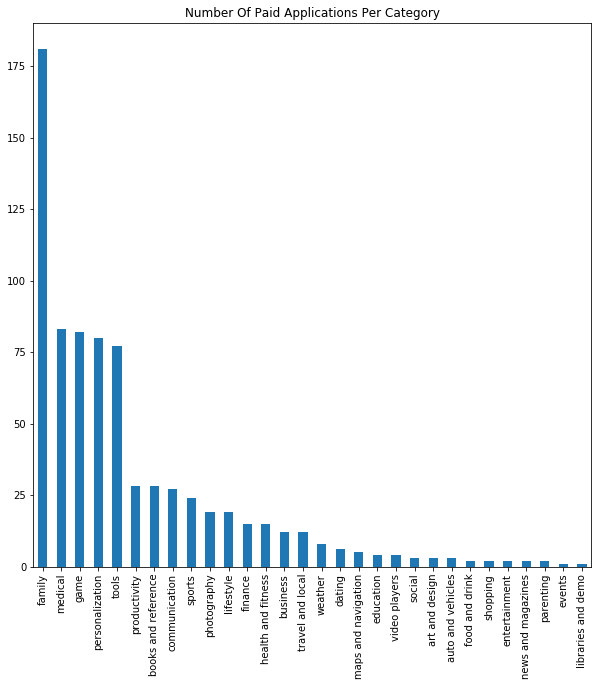

In [36]:
group_2['Category'].value_counts().plot(kind = 'bar', title = 'Number Of Paid Applications Per Category', figsize = (10,10))

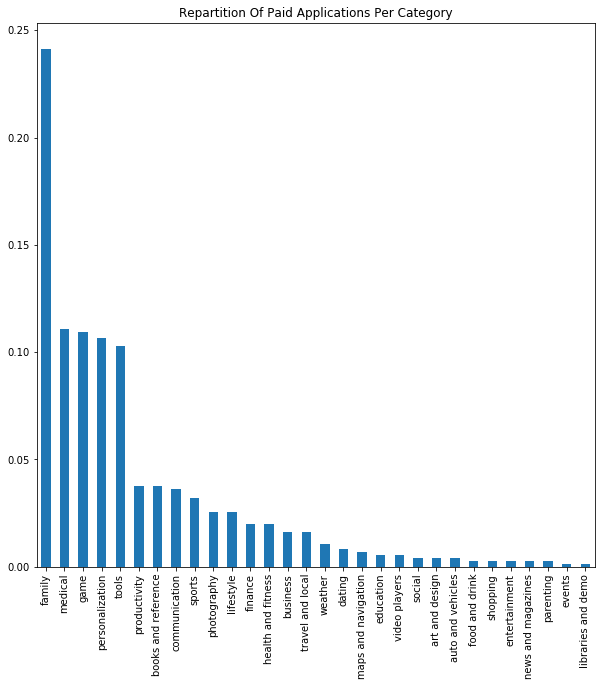

In [37]:
group_2['Category'].value_counts(normalize = 'True').plot.bar(title = 'Repartition Of Paid Applications Per Category',figsize = (10,10))

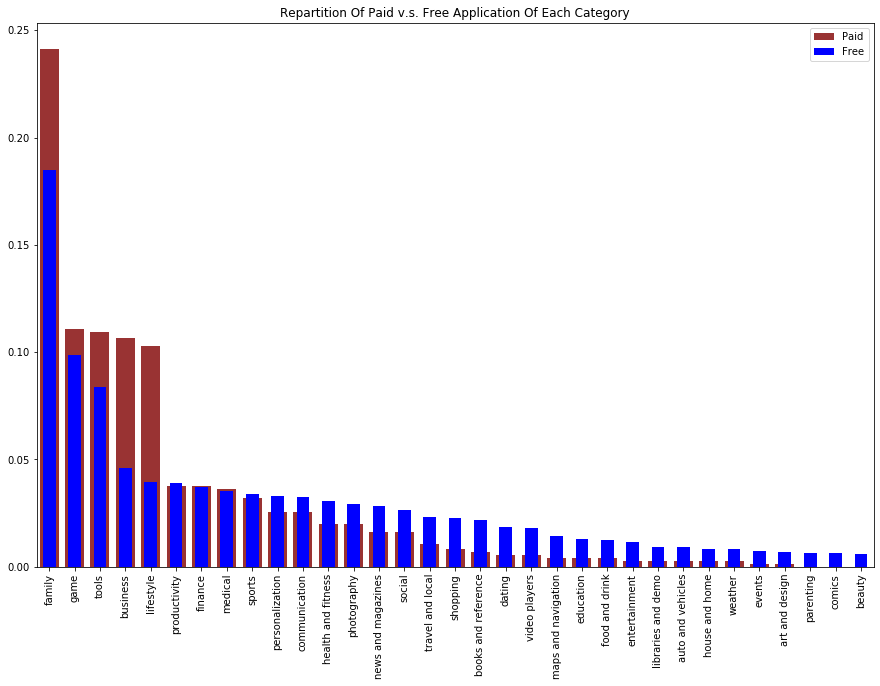

In [38]:
ax = group_2['Category'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.75, legend=True, alpha=0.8)
group_1['Category'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.5, alpha=1, legend=True, figsize = (15,10), title = "Repartition Of Paid v.s. Free Application Of Each Category")
ax.legend(['Paid', 'Free'])

Now that we know the repartition of the categories for the applications, we can now try to see what it gives once that we group these result with the installation rates of both paid and free applications. We are continuing to do the analysis with both paid and free applications in order to see what brings the difference between the number of downloads. Maybe we will be able to identitfy a marking detail which will help to build an efficient model to predict the chances of success of an application. 

So now back to our results, for the moment we can see that for both paid and free applications, the number of family applications is the most proeminent. In second place, we have medical application for the paid and games for the free. For third most popular type of application in terms of the number of applications that exists in those category, we have the games for the paid applications and the tools for free appications. 


In order to narrow down our analysis, we are going to take the top 5 categories of each type of application.  

In [39]:
group_1cat = group_1[['App', 'Category', 'Installs']]
group_2cat = group_2[['App', 'Category', 'Installs']]


#creating the top 5 category for free apps
group_1fam_cat = group_1cat.loc[group_1cat['Category' ]== 'family']
group_1game_cat = group_1cat.loc[group_1cat['Category' ]== 'game']
group_1tool_cat = group_1cat.loc[group_1cat['Category' ]== 'tools']
group_1bus_cat = group_1cat.loc[group_1cat['Category' ]== 'business']
group_1life_cat = group_1cat.loc[group_1cat['Category' ]== 'lifestyle']
#creating the top 5 category for paid apps
group_2fam_cat = group_2cat.loc[group_2cat['Category' ]== 'family']
group_2med_cat = group_2cat.loc[group_2cat['Category' ]== 'medical']
group_2game_cat = group_2cat.loc[group_2cat['Category' ]== 'game']
group_2perso_cat = group_2cat.loc[group_2cat['Category' ]== 'personalization']
group_2tool_cat = group_2cat.loc[group_2cat['Category' ]== 'tools']


In [40]:
group_1cat['Category'].value_counts(normalize = 'True')


family                 0.184943
game                   0.098501
tools                  0.083850
business               0.045869
lifestyle              0.039446
productivity           0.038995
finance                0.036853
medical                0.035050
sports                 0.033923
personalization        0.032909
communication          0.032458
health and fitness     0.030655
photography            0.029302
news and magazines     0.028401
social                 0.026485
travel and local       0.023329
shopping               0.022540
books and reference    0.021751
dating                 0.018596
video players          0.017920
maps and navigation    0.014200
education              0.012961
food and drink         0.012284
entertainment          0.011270
libraries and demo     0.009242
auto and vehicles      0.009242
house and home         0.008340
weather                0.008002
events                 0.007100
art and design         0.006762
parenting              0.006537
comics  

As we can see, we have a lot of values and they would be hard to see in a graphic representation. However, we can take the top 5 categories and compare their results in terms of installation rates and try to see how they differentiate themselves. We will take the top 5 categories are we are interesting in finding the winnning combo of characteristics in order to get a good application. This means that we need to narrow down to the best of the best criterias. 

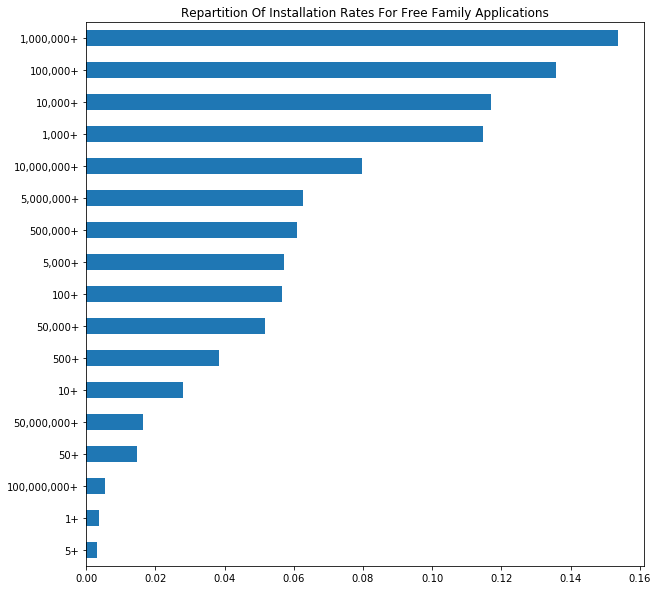

In [41]:
group_1fam_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Free Family Applications', figsize = (10,10))

In [42]:
group_1fam_cat['Installs'].value_counts()

1,000,000+      252
100,000+        223
10,000+         192
1,000+          188
10,000,000+     131
5,000,000+      103
500,000+        100
5,000+           94
100+             93
50,000+          85
500+             63
10+              46
50,000,000+      27
50+              24
100,000,000+      9
1+                6
5+                5
Name: Installs, dtype: int64

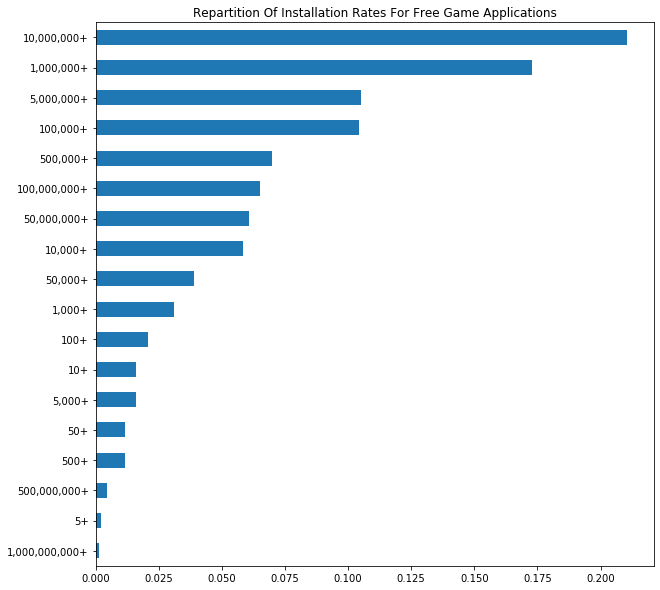

In [43]:
group_1game_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Free Game Applications',figsize = (10,10))

In [44]:
group_1game_cat['Installs'].value_counts()

10,000,000+       184
1,000,000+        151
5,000,000+         92
100,000+           91
500,000+           61
100,000,000+       57
50,000,000+        53
10,000+            51
50,000+            34
1,000+             27
100+               18
10+                14
5,000+             14
50+                10
500+               10
500,000,000+        4
5+                  2
1,000,000,000+      1
Name: Installs, dtype: int64

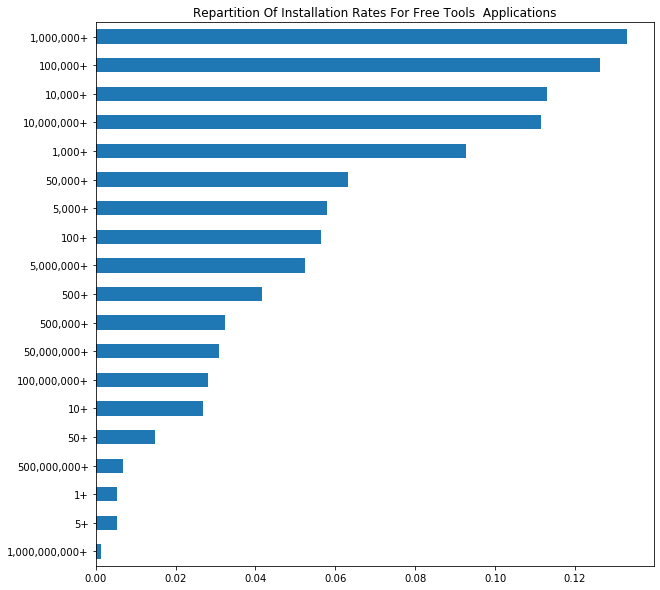

In [45]:
group_1tool_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Free Tools  Applications', figsize = (10,10))

In [46]:
group_1tool_cat['Installs'].value_counts()

1,000,000+        99
100,000+          94
10,000+           84
10,000,000+       83
1,000+            69
50,000+           47
5,000+            43
100+              42
5,000,000+        39
500+              31
500,000+          24
50,000,000+       23
100,000,000+      21
10+               20
50+               11
500,000,000+       5
5+                 4
1+                 4
1,000,000,000+     1
Name: Installs, dtype: int64

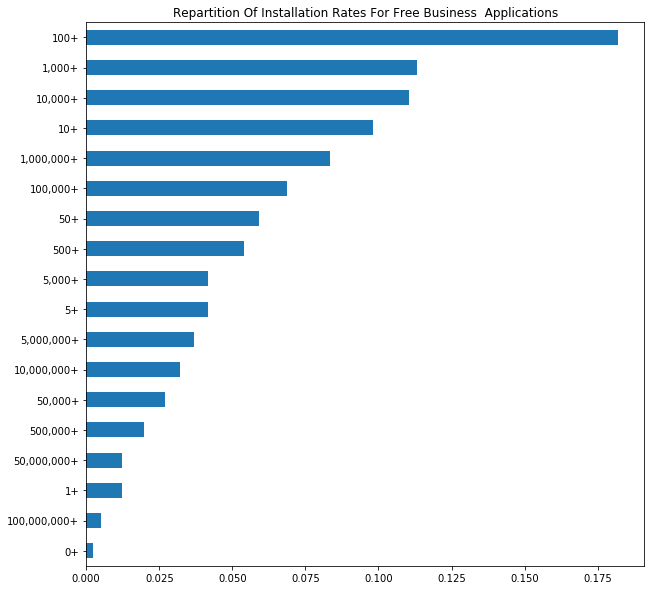

In [47]:
group_1bus_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Free Business  Applications', figsize = (10,10))

In [48]:
group_1bus_cat['Installs'].value_counts()

100+            74
1,000+          46
10,000+         45
10+             40
1,000,000+      34
100,000+        28
50+             24
500+            22
5,000+          17
5+              17
5,000,000+      15
10,000,000+     13
50,000+         11
500,000+         8
50,000,000+      5
1+               5
100,000,000+     2
0+               1
Name: Installs, dtype: int64

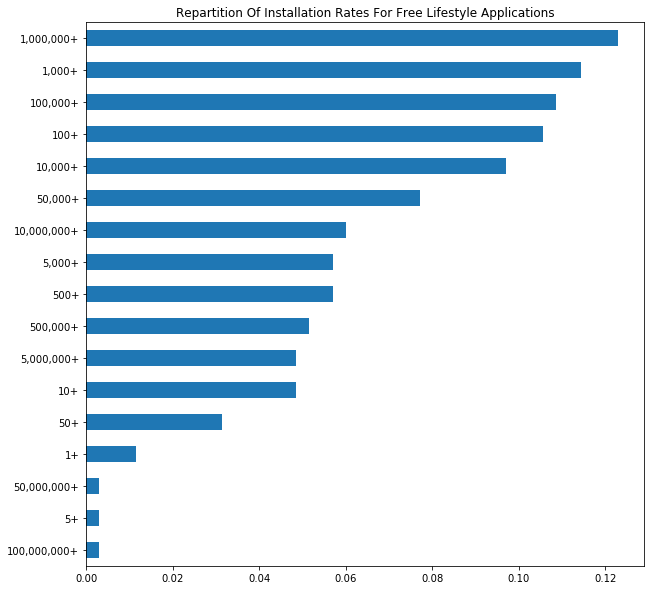

In [49]:
group_1life_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Free Lifestyle Applications', figsize = (10,10))

In [50]:
group_1life_cat['Installs'].value_counts()

1,000,000+      43
1,000+          40
100,000+        38
100+            37
10,000+         34
50,000+         27
10,000,000+     21
5,000+          20
500+            20
500,000+        18
5,000,000+      17
10+             17
50+             11
1+               4
5+               1
50,000,000+      1
100,000,000+     1
Name: Installs, dtype: int64

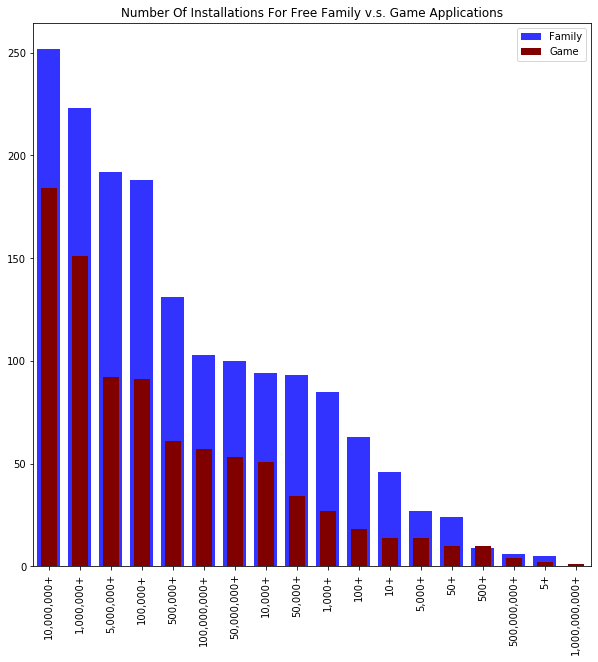

In [51]:
ax = group_1fam_cat['Installs'].value_counts().plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
group_1game_cat['Installs'].value_counts().plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (10,10), title = "Number Of Installations For Free Family v.s. Game Applications")
ax.legend(['Family', 'Game'])

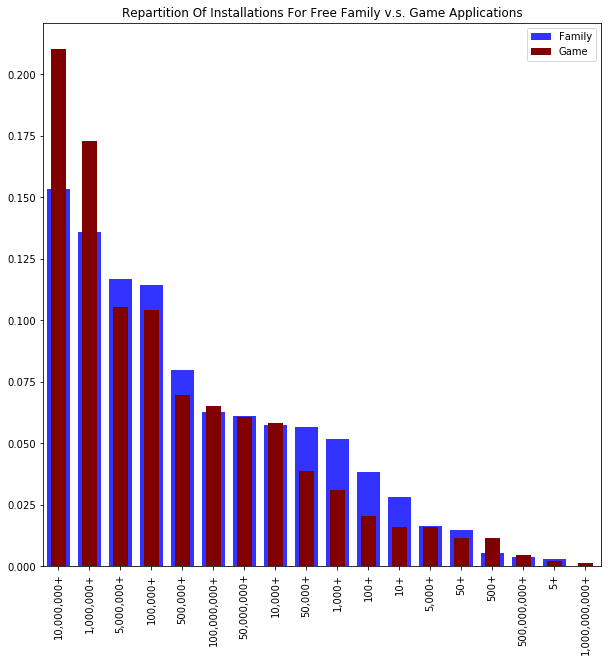

In [52]:
ax = group_1fam_cat['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
group_1game_cat['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (10,10), title = "Repartition Of Installations For Free Family v.s. Game Applications")
ax.legend(['Family', 'Game'])

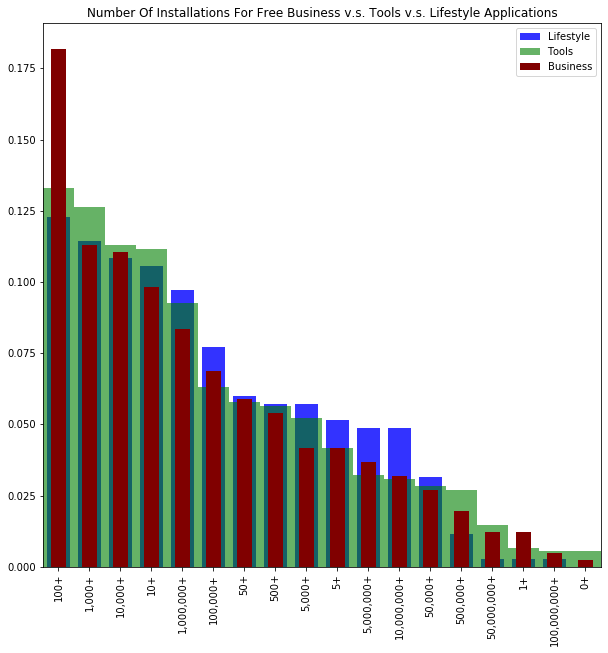

In [53]:
ax = group_1life_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = group_1tool_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

group_1bus_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (10,10), title = "Number Of Installations For Free Business v.s. Tools v.s. Lifestyle Applications")
ax.legend(['Lifestyle', 'Tools', 'Business'])

From these graphs and information, we can gather that in terms of proportions to number of applications in each category, there is a better chance to get at least 10 000 000+ installations if you are a free game application. The category with the best ration of number of installations and number of applications is:

1- Game

2- Family

3- Tools

4- Lifestyle

5-Business

However, if we take into account the volume of the categories, we could say that the game and family categories are on similar levels as their number in each categories are similar. 

For the other three categories, they have similar distributions except the 100+ range for the business applications where there is a much higher proportion of business application in that range compared to the other two categories. 

Now we will try to see what are the repartitions in terms of the paid applications. We are looking at the paid applications too as we are trying to discern if the category factor is really influencing all that much the number of installation or not. 




In [54]:
group_2cat['Category'].value_counts(normalize  = 'True')

family                 0.241333
medical                0.110667
game                   0.109333
personalization        0.106667
tools                  0.102667
productivity           0.037333
books and reference    0.037333
communication          0.036000
sports                 0.032000
photography            0.025333
lifestyle              0.025333
finance                0.020000
health and fitness     0.020000
business               0.016000
travel and local       0.016000
weather                0.010667
dating                 0.008000
maps and navigation    0.006667
education              0.005333
video players          0.005333
social                 0.004000
art and design         0.004000
auto and vehicles      0.004000
food and drink         0.002667
shopping               0.002667
entertainment          0.002667
news and magazines     0.002667
parenting              0.002667
events                 0.001333
libraries and demo     0.001333
Name: Category, dtype: float64

In [55]:
group_2fam_cat['Installs'].value_counts()

10,000+        34
100,000+       25
1,000+         24
100+           21
10+            15
5,000+         14
50,000+        13
50+            11
500+            6
1,000,000+      5
1+              4
500,000+        4
5+              2
0+              2
10,000,000+     1
Name: Installs, dtype: int64

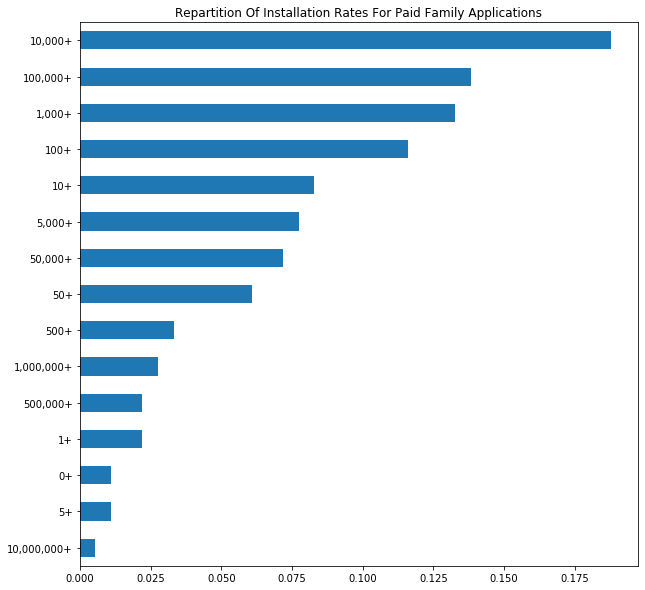

In [56]:
group_2fam_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Paid Family Applications', figsize = (10,10))

In [57]:
group_2med_cat['Installs'].value_counts() 

1,000+      26
10,000+     13
100+        11
5,000+      10
500+         7
50+          4
1+           3
10+          3
50,000+      3
100,000+     2
0+           1
Name: Installs, dtype: int64

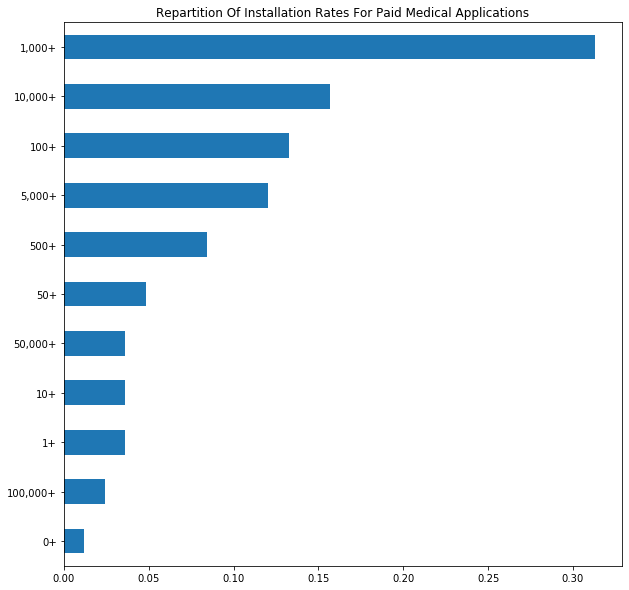

In [58]:
group_2med_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Paid Medical Applications', figsize = (10,10)) 

In [59]:
group_2game_cat['Installs']. value_counts()

100,000+       21
1,000+         13
10,000+        12
100+            9
1,000,000+      8
1+              5
50,000+         5
5,000+          3
500+            2
10,000,000+     1
50+             1
500,000+        1
10+             1
Name: Installs, dtype: int64

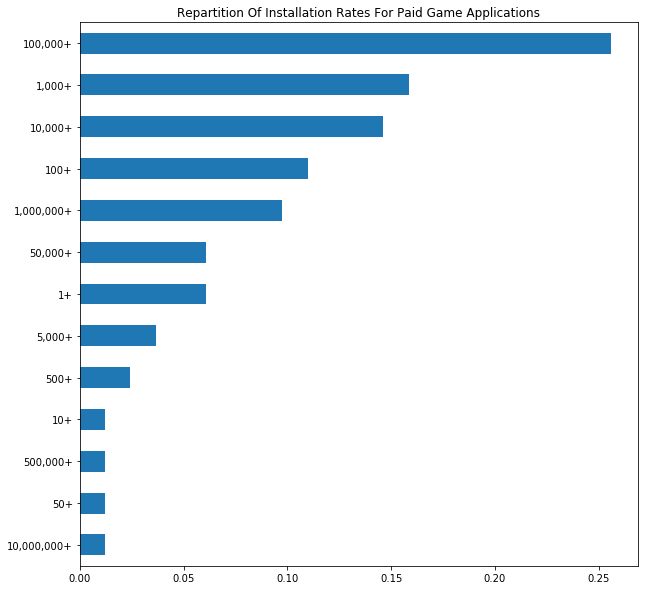

In [60]:
group_2game_cat['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Paid Game Applications', figsize = (10,10))

In [61]:
group_2perso_cat ['Installs']. value_counts()

100+          14
1,000+        13
10,000+       12
10+            8
500+           6
50+            6
100,000+       5
1+             4
5,000+         4
5+             2
1,000,000+     2
50,000+        2
0+             1
500,000+       1
Name: Installs, dtype: int64

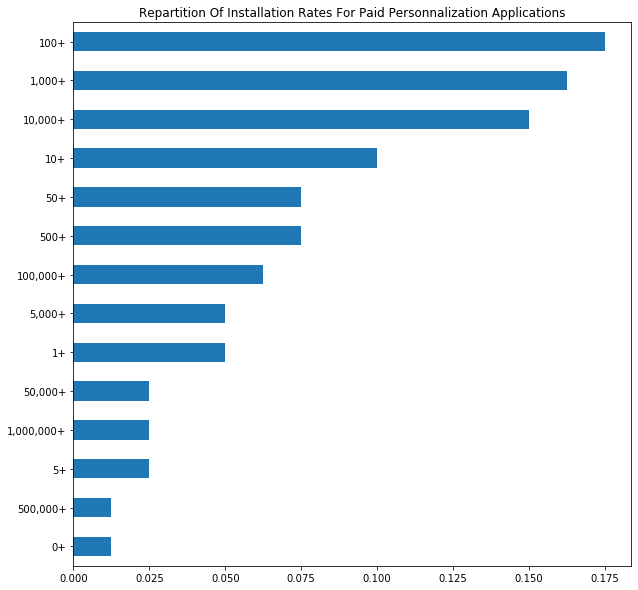

In [62]:
group_2perso_cat ['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Paid Personnalization Applications', figsize = (10,10))

In [63]:
group_2tool_cat['Installs'].value_counts()

10,000+       16
1,000+        13
100+          12
5,000+        10
10+            7
500+           6
100,000+       4
50+            3
5+             2
50,000+        2
1+             1
1,000,000+     1
Name: Installs, dtype: int64

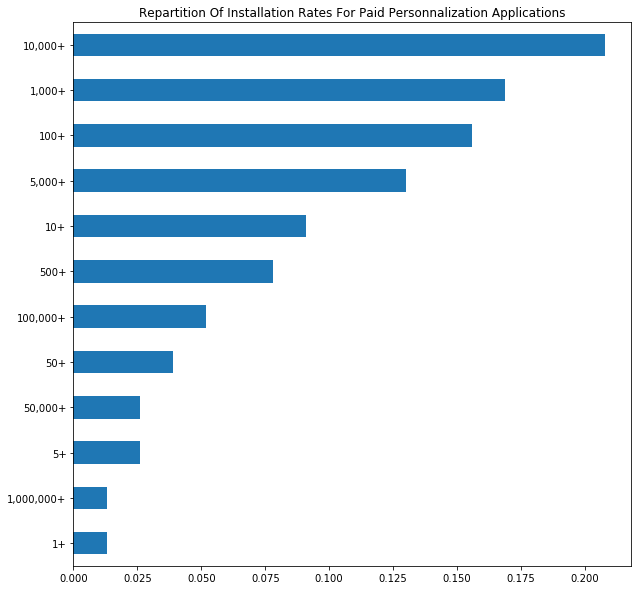

In [64]:
group_2tool_cat ['Installs'].value_counts(normalize = True).sort_values(ascending = True).plot.barh(title = 'Repartition Of Installation Rates For Paid Personnalization Applications', figsize = (10,10))

From the graphics above, we can now look at the modes of the paid applications. These modes help us see what is the most probable installation rate if an application is paid and of a certain category. As Game and family application seem to have similar repartitions, we are going to compare them together and then look at the other three in order to determine in which order they are going to be for their success rate. Moreover, we will observe if the repartitions from the the paid categories v.s. the repartitions from the free categories are similar. 


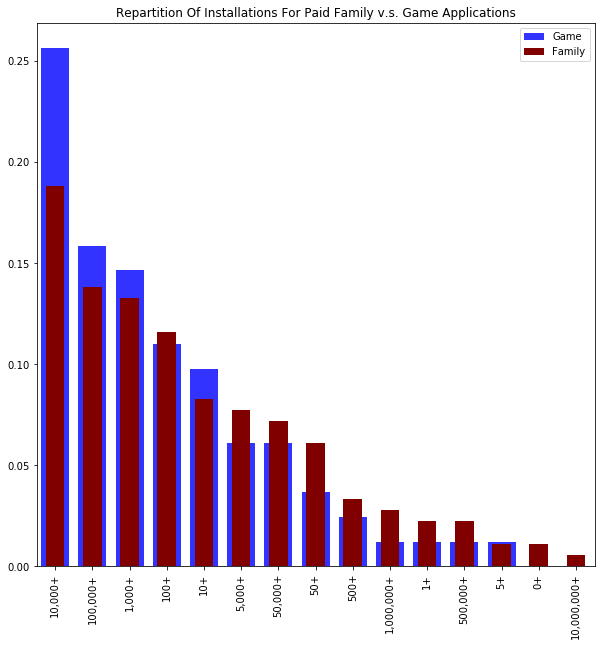

In [65]:
ax = group_2game_cat['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
group_2fam_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (10,10), title = "Repartition Of Installations For Paid Family v.s. Game Applications")
ax.legend(['Game', 'Family'])


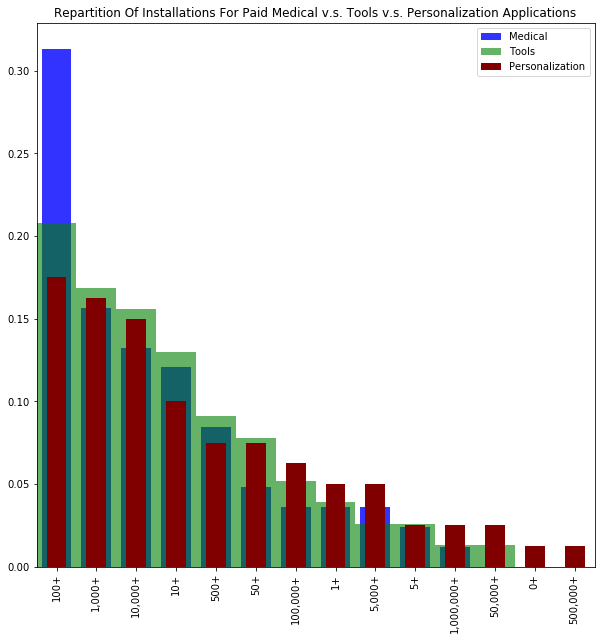

In [85]:
ax = group_2med_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = group_2tool_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

group_2perso_cat ['Installs'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (10,10), title = "Repartition Of Installations For Paid Medical v.s. Tools v.s. Personalization Applications")
ax.legend(['Medical', 'Tools', 'Personalization'])


From the bar plot above, we can see that the distributions for the game and family categories in terms of free or paid, however, the number of installations is much lower in the paid applications. However, for the other three categories of the paid applications, the distributions are highly similar except for the 100+ installations range where the medical distribution is much higher than the other two. 

We can then reach a conclusion that the main characteristic up until now for success rate is the paid vs free and the, regardless of paid or free, the best categories to be in is either family or game applications. These categories show higher modes and higher installation rates overall. 

### Question 3 Do the ratings and tone of the comment have an influence on the number of installations of an application

For this section, we are going to use the categories of family and game and try to compare the general review sentiment and rating with the number of installations. According to the various settings that we are going to get, we are then going to try to see if we can make a prediction of what makes a successful application. 

We are going to start by getting the names of the applications that are free and game, free and family, paid and game, paid and family and from those names, get the subsets of data from the review set. We know we have the best 100 reviews of the applications in this set. As they are the best reviews, we know it is a more subjective set, but it can still give some insight on the data and applications that are present. 

From the applications that are in those lists, we are going to look at the top ones in terms of number of installation, the best ones for the modes and some that are below average. 

In [67]:
#start with the free family apps

group_1fam_cat['Installs'].value_counts()

1,000,000+      252
100,000+        223
10,000+         192
1,000+          188
10,000,000+     131
5,000,000+      103
500,000+        100
5,000+           94
100+             93
50,000+          85
500+             63
10+              46
50,000,000+      27
50+              24
100,000,000+      9
1+                6
5+                5
Name: Installs, dtype: int64

In [96]:
#we are going to take the top 5 1 000 000+ apps, top 100 000+ apps top 50 000 000+ apps and top 5 100 000 000+ apps
#gather first by install rate
freefam_1mil = group_1.loc[group_1['Installs' ]== '1,000,000+']
freefam_50mil = group_1.loc[group_1['Installs' ]== '50,000,000+']
freefam_100mil = group_1.loc[group_1['Installs' ]== '100,000,000+']



It was noticed that the review dataset stops at the application names starting at H. This is an issue and as such it will be impossible to compare the sentiment. However, as we have the ratings, we will use the average that is there as a way to compare the success for the applications that are the most installed and the mode of each category. 

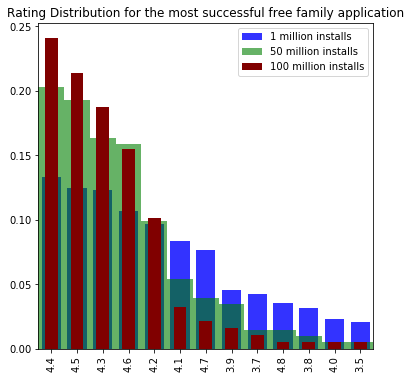

In [95]:
ax = freefam_1mil['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = freefam_50mil ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

freefam_100mil ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (6,6), title = "Rating Distribution for the most successful free family application")
ax.legend(['1 million installs', '50 million installs', '100 million installs'])

From this bar graph, it is possible to see that for the most successfull applications, the ratings are generaly between 4.6 and 4.2. Lower or higher ratings are showing a drastic difference in quantities. As for the mode of the free family applications, we are in a situation where we can see that the distribution is more even. It is to note also that there is no rating lower than 3.5 out of 5. We will now see what is the situation with the worse applications from the free family applications. 

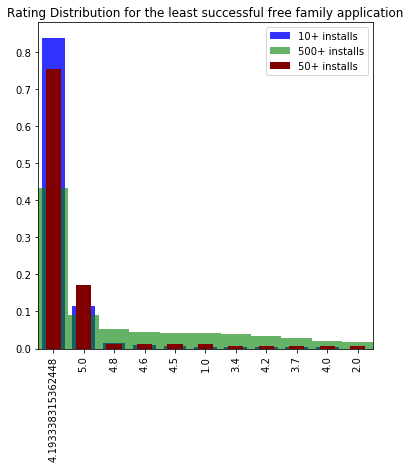

In [99]:
freefam_10 = group_1.loc[group_1['Installs' ]== '10+']
freefam_500 = group_1.loc[group_1['Installs' ]== '500+']
freefam_50 = group_1.loc[group_1['Installs' ]== '50+']


ax = freefam_10['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = freefam_500 ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

freefam_50 ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (6,6), title = "Rating Distribution for the least successful free family application")
ax.legend(['10+ installs', '500+ installs', '50+ installs'])

For these application, we disregarded the the section where the applications were at 1+ or 5+ installations as there were too few values to compare. Some of these sections only had 5 inputs and it meanst that the distribution might not be as representative so we went with the lowest sections that had at least 20 entries. 

From this distribution we can see that the distribution is not even. Most ratings are at 4.2, but there are ratings as low as 1 out of five. However, the ratings that are not 4.2 are in small quantities. This could suggest that there is a tendency for users to not necessarily give a fair rating but more a quick answer to the pop up on the screen that asks to get a rating. We will compare with the other free and paid chosen categories. 

We will now take a look at the situation on the side of the free game applications. 

In [100]:
group_1game_cat['Installs'].value_counts()

10,000,000+       184
1,000,000+        151
5,000,000+         92
100,000+           91
500,000+           61
100,000,000+       57
50,000,000+        53
10,000+            51
50,000+            34
1,000+             27
100+               18
10+                14
5,000+             14
50+                10
500+               10
500,000,000+        4
5+                  2
1,000,000,000+      1
Name: Installs, dtype: int64

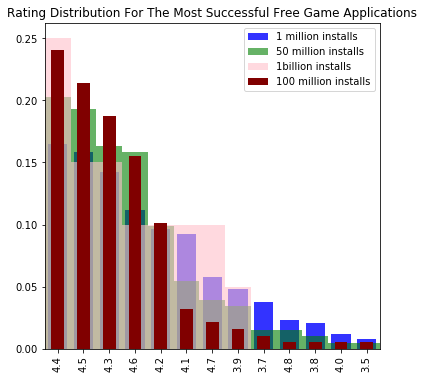

In [104]:
freegame_10mil = group_1.loc[group_1['Installs' ]== '10,000,000+']
freegame_50mil = group_1.loc[group_1['Installs' ]== '50,000,000+']
freegame_100mil = group_1.loc[group_1['Installs' ]== '100,000,000+']
freegame_1bil = group_1.loc[group_1['Installs' ]== '1,000,000,000+']
ax = freegame_10mil['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = freegame_50mil ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)
ax1 = freegame_1bil ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='pink', width=1, legend=True, alpha=0.6)

freegame_100mil ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (6,6), title = "Rating Distribution For The Most Successful Free Game Applications")
ax.legend(['1 million installs', '50 million installs','1billion installs', '100 million installs'])

From the bar graph above, we can see that the distribution for the successful free game applications is similar  to the one we observed in the free family applications. It is mostly concentrated between the values of 4.3 and 4.6. The rest of the ratings are either higher or lower but not lower than 3.5 out of 5. Now let us see what the trend is in terms of the least successful free game application. Just as it was done for the free family applications, we are going to look at the three least successful applications that have at least 20 applications in their range. 

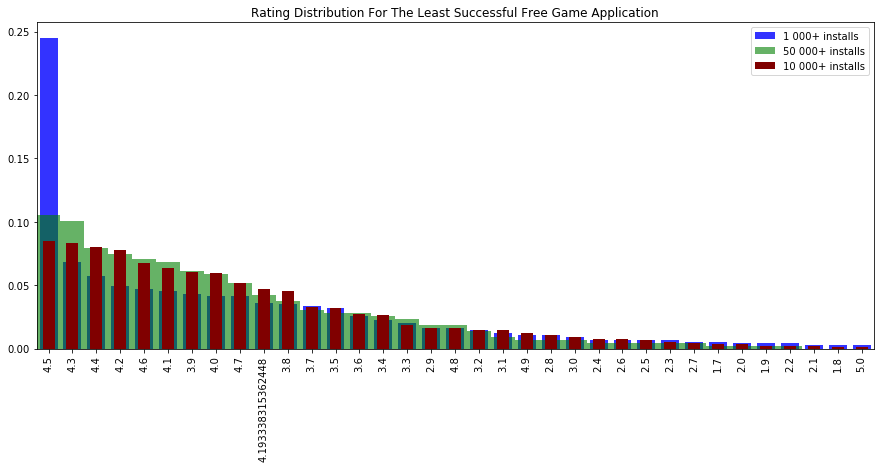

In [119]:
freegame_1k = group_1.loc[group_1['Installs' ]== '1,000+']
freegame_50k = group_1.loc[group_1['Installs' ]== '50,000+']
freegame_10k = group_1.loc[group_1['Installs' ]== '10,000+']


ax = freegame_1k['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = freegame_50k ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

freegame_10k ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (15,6), title = "Rating Distribution For The Least Successful Free Game Application")
ax.legend(['1 000+ installs', '50 000+ installs', '10 000+ installs'])

From this distribution, we can see that the values are mainly between ratings of 4.1 and 4.6 before experiencing a steady decline. The values of the ratings are very spread out outside of the main concentration of the ratings. The lowest rating given is a 2 compare to a 1 for the family applications. It is also possible to notice that the distribution in this case is even more spread out than the distribution of the values in the case of the free family applications. 

Before continuing further in making the comparison, we will now take a look at the paying applications and see if we are getting similar distributions or not for the same categories. 

In [112]:
#paid family applications

group_2fam_cat['Installs'].value_counts()

10,000+        34
100,000+       25
1,000+         24
100+           21
10+            15
5,000+         14
50,000+        13
50+            11
500+            6
1,000,000+      5
1+              4
500,000+        4
5+              2
0+              2
10,000,000+     1
Name: Installs, dtype: int64

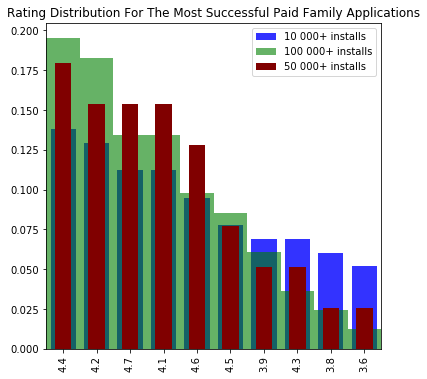

In [115]:
paidfam_10k = group_2.loc[group_2['Installs' ]== '10,000+']
paidfam_100k= group_2.loc[group_2['Installs' ]== '100,000+']
paidfam_50k = group_2.loc[group_2['Installs' ]== '50,000+']
ax = paidfam_10k['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = paidfam_100k ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

paidfam_50k ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (6,6), title = "Rating Distribution For The Most Successful Paid Family Applications")
ax.legend(['10 000+ installs', '100 000+ installs', '50 000+ installs'])

For the least successfull applications we are looking for sections that have at least 4 applications. This distribution is not the most representative, but at least it helps to see if the trends seem to maintain or not for the paid family applications applications. 

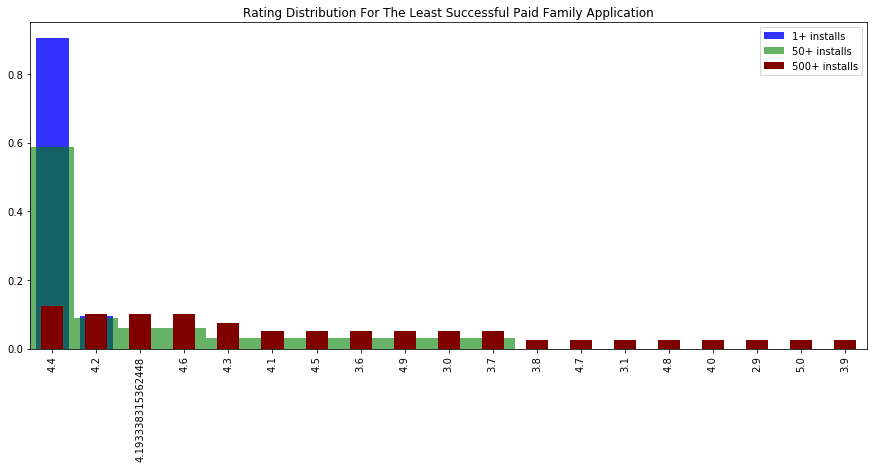

In [123]:
paidfam_1 = group_2.loc[group_2['Installs' ]== '1+']
paidfam_50 = group_2.loc[group_2['Installs' ]== '50+']
paidfam_500 = group_2.loc[group_2['Installs' ]== '500+']


ax = paidfam_1['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = paidfam_50 ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

paidfam_500 ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (15,6), title = "Rating Distribution For The Least Successful Paid Family Application")
ax.legend(['1+ installs', '50+ installs', '500+ installs'])

From these two distributions, we can see that for the more successful paid family applications they are mostly either on 4.7 or between 4.2 and 4.4 and there is no lower rating than 3.6 This follows the distributions that we were able to observe in the case of the free application. 

As for the less successful applications, we again have a similar trend where the majority of the scores are on 4.4 and the rest is scatered in a more even manner. However, one difference with the paid family application is that there is no rating lower than 2.9 over 5. Up until now this is the first 'big' difference between the various comparable values. Does this mean that for paid applications, even if there are less installations, the ratings are generally better?

We will now take a look a the paid game application and see if there is any conclusion we can take from those distributions. 

In [124]:
group_2game_cat['Installs'].value_counts()

100,000+       21
1,000+         13
10,000+        12
100+            9
1,000,000+      8
1+              5
50,000+         5
5,000+          3
500+            2
10,000,000+     1
50+             1
500,000+        1
10+             1
Name: Installs, dtype: int64

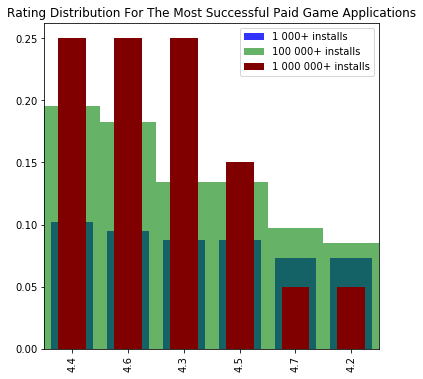

In [127]:
paidgame_1k = group_2.loc[group_2['Installs' ]== '1,000+']
paidgame_100k= group_2.loc[group_2['Installs' ]== '100,000+']
paidgame_1mil= group_2.loc[group_2['Installs' ]== '1,000,000+']
ax = paidgame_1k['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
ax1 = paidgame_100k ['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='green', width=1, legend=True, alpha=0.6)

paidgame_1mil['Rating'].value_counts(normalize = 'True').plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True, figsize = (6,6), title = "Rating Distribution For The Most Successful Paid Game Applications")
ax.legend(['1 000+ installs', '100 000+ installs', '1 000 000+ installs'])

In this distribution we can see that the paid game applications with high installation rates are all having steady, near even distribution of ratings between the values of 4.2 and 4.7. This is the highest distribution that we have seen so far. We have to keep in mind that there are much less values and as sucjh it might have led an influence on this distribution. It does seem however to follow the trend that we have noticed in the other cathegories where the ratings of the most successful applications are between 4.4-4.2 and 4.6-4.7. 

In terms of the unsuccessful applications for the paid games, there are not enough values in order to have a distribution that would reflect the reality. As such, we are not going to do the distribution for these values. 

## Conclusion

As a result of this analysis, there are a few things that we can say and quite a few questions that are rising up also. In this analysis, we were able to see some major factors that are going to influence the success of an application, which is the main goal of this analysis. If we take the questions one at a time, we can see that if an individual desires to make an application, it is better to make a free application. Not only is there much more free applications than paid applications, but the number of installation is much higher. The free applications have the same modes than the paid applications, but they also have a large amount of data in numbers of installations that the paid applications are struggling to reach or do not reach at all like 1 000 000 000+ installation rates. 

Now that we know free applications are better than the paid applications in term of installation rate, which is our parameter to measure success in this case, we can look at the categories. From the distribution of the applications in each categories, we picked the five categories which had the most applications. In the case of the paid applications, the 5 most common applications are the game, family, medical, tools and personalization applications. For the free ones its the games, family, tools, business and lifestyle. Now if we go back on the observations that we have made earlier about those categories, we can see that tin both paid and free applications the applications with the highest installation rates are the family and games. From this conclusion, we are going to move one to our third question using this result.

For the last part of this project, we have attempted to see if there is a link between the ratings and the number of downloads for the applications. In order to do so, we have taken the highest amount of downloads seen in each category allow with its mode to see how the rates are distributed as well as the bottom three download rates that can be found for those categories. We have four total categories, paid family, paid games, free family, free games. From the distribution that we have observed, for the successful applications, which means the application which managed to be installed the most often, the rating is usually between 4.2 and 4.6, no matter the type or category of application. However, the less successful, or failure (as it does not reach a sufficient amount of installations) , have either most of their rating concentrated on one value or the values are all spread out evenly. Another difference to note between the successes and failures, is that the lowest value of a rating in the successes is 3,5 but for the failures it does reach 1(out of 5).  I would like to mention that we had to let go of doing the distribution for the games with the least amount of success for the paid game category as we were lacking data. We only had data from one five applications total, which would not represent the market in real life. 

As such from these observations we can assume that one would need to have a free application in the categories of either family or game in order to maximize the chances of success. Moreover, although the ratings do not seem to have a direct impact on the success of the applications, it is safe to assume that taking care of your ratings and feedback from your users. Moreover, as the successful applications do not have any highly negative ratings, it is safe to assume that it helps to encourage new users to install the application. 

On another note, there were a few issues in the making of this analysis. Some questions had to be changed partially or entirely for various reasons(lac of time to make natural language processing, lack of data for the review, lack of data for the paid games). These issues could be solved by enriching the data set and if more time was allotted. However, despite those setbacks and changes, we found answers and we now have more questions. It would also be possible to improve the model by adding other features such as the genre, the target market (adult, teen, everyone, …). Another information that would be good to know is if there are microtransactions in the applications and the revenue of those. That way we would be able to base the success of an application not only on the number of installations (as assumed users) but on the amount of revenue that it produces. The improved model of the current trends could then be used in order to try to predict what the future trends will be. We know what the basic requirements of a successful application are at the moment, but what will they be and how will we determine the future trend? I end my report on this question which might be taken by someone else eventually or even by myself to further gain knowledge on the applications. 


